# Modul 3 Praktikum Data Mining
## Nama : Fauzan Kamil
## NPM : 201910225134

# Jaringan Syaraf Tiruan

In [110]:
#Impor Pustaka
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import model_from_yaml
from google.colab import files
import io

In [111]:
#File = beasiswa, validasi_beasiswa, testbeasiswa
'''
upload_files = files.upload()
for filename in upload_files.keys():
  x=upload_files[filename].decode('utf-8')
data1 = pd.read_csv(io.StringIO(x), header=None)
print(data1.head())

upload_files = files.upload()
for filename in upload_files.keys():
  x=upload_files[filename].decode('utf-8')
data2 = pd.read_csv(io.StringIO(x), header=None)
print(data2.head())

upload_files = files.upload()
for filename in upload_files.keys():
  x=upload_files[filename].decode('utf-8')
data3 = pd.read_csv(io.StringIO(x), header=None)
print(data3.head())
'''
data1 = pd.read_csv('beasiswa.csv')
data2 = pd.read_csv('validasibeasiswa.csv')
data3 = pd.read_csv('testbeasiswa.csv')

In [112]:
data1.head()

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak
0,1,0.8,0.8,0.0
1,2,1.2,1.0,0.0
2,3,1.0,1.2,0.0
3,4,2.0,1.5,0.0
4,5,0.7,1.5,0.0


In [113]:
data2.head()

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak *
0,1,0.7,0.7,0
1,2,1.2,1.1,0
2,3,0.6,1.6,0
3,4,2.4,3.1,1
4,5,3.0,2.4,1


In [114]:
data3.head()

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak *
0,1,0.75,0.74,0
1,2,1.25,1.16,0
2,3,0.67,1.69,0
3,4,2.47,3.19,1
4,5,3.54,2.45,1


In [115]:
#data training
df1=pd.DataFrame(data1,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)','Beasiswa/Tidak'])
X1=np.asarray(data1)
x_train=X1[1:,1:3]
y_train=X1[1:,3:4]

In [116]:
#data validasi
df2=pd.DataFrame(data2,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)','Beasiswa/Tidak'])
X2=np.asarray(data2)
x_val=X2[1:,1:3]
y_val=X2[1:,3:4]

In [118]:
#data testing
df3=pd.DataFrame(data3,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)','Beasiswa/Tidak'])
X3=np.asarray(data3)
x_test=X3[1:,1:3]
y_test=X3[1:,3:4]

In [119]:
#Mendifinisiakan arsitektur model
model = Sequential()
model.add(Dense(64, input_dim=2,activation = "relu")) #Layer 1 (NOTE: sesuaikan dimensi input)
model.add(Dense(32,activation = "relu")) #Layer 2
model.add(Dense(32,activation = "relu")) #Layer 3
model.add(Dense(8,activation = "relu")) #Layer 4
model.add(Dense(8,activation = "relu")) #Layer 5
model.add(Dense(4,activation = "relu")) #Layer 6
model.add(Dense(1,activation = "sigmoid")) #Output Layer

In [120]:
#Mengkonfigurasi Model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                192       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 8)                 264       
                                                                 
 dense_34 (Dense)            (None, 8)                 72        
                                                                 
 dense_35 (Dense)            (None, 4)                 36        
                                                                 
 dense_36 (Dense)            (None, 1)                

In [122]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_val,y_val))

Epoch 1/150
1/1 [==============================] - 1s 793ms/step - loss: 0.6895 - accuracy: 0.6000 - val_loss: 0.6844 - val_accuracy: 0.6667
Epoch 2/150
1/1 [==============================] - 0s 33ms/step - loss: 0.6865 - accuracy: 0.6000 - val_loss: 0.6808 - val_accuracy: 0.6667
Epoch 3/150
1/1 [==============================] - 0s 28ms/step - loss: 0.6839 - accuracy: 0.6000 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 4/150
1/1 [==============================] - 0s 34ms/step - loss: 0.6812 - accuracy: 0.6000 - val_loss: 0.6736 - val_accuracy: 0.6667
Epoch 5/150
1/1 [==============================] - 0s 30ms/step - loss: 0.6788 - accuracy: 0.6000 - val_loss: 0.6703 - val_accuracy: 0.6667
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.6763 - accuracy: 0.6000 - val_loss: 0.6676 - val_accuracy: 0.6667
Epoch 7/150
1/1 [==============================] - 0s 42ms/step - loss: 0.6741 - accuracy: 0.6000 - val_loss: 0.6646 - val_accuracy: 0.6667
Epoch 8/150
1/1 [==

In [123]:
#Prediksi hasil simulasi model JST terhadap data validasi
pred = model.predict(x_val)
print(pred)

[[0.41181755]
 [0.41245747]
 [0.9884585 ]
 [0.9387522 ]
 [0.99835867]
 [0.99461037]]


# JST Dalam Klasifikasi Gambar

In [66]:
!wget --no-check-certificate \     https://github.com/Fauzan-Kamil/piton-data/blob/main/cabe.zip?raw=true \
                                   -O /tmp/cabe.zip 

--2022-06-05 00:50:41--  http://%20/
Resolving   ( )... failed: Name or service not known.
wget: unable to resolve host address ‘ ’
--2022-06-05 00:50:41--  https://github.com/Fauzan-Kamil/piton-data/blob/main/cabe.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Fauzan-Kamil/piton-data/raw/main/cabe.zip [following]
--2022-06-05 00:50:42--  https://github.com/Fauzan-Kamil/piton-data/raw/main/cabe.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/cabe.zip [following]
--2022-06-05 00:50:42--  https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/cabe.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.g

In [67]:
!wget --no-check-certificate \    https://github.com/Fauzan-Kamil/piton-data/blob/main/valid.zip?raw=true \
                                  -O /tmp/valid.zip 

--2022-06-05 00:51:00--  http://%20/
Resolving   ( )... failed: Name or service not known.
wget: unable to resolve host address ‘ ’
--2022-06-05 00:51:00--  https://github.com/Fauzan-Kamil/piton-data/blob/main/valid.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Fauzan-Kamil/piton-data/raw/main/valid.zip [following]
--2022-06-05 00:51:01--  https://github.com/Fauzan-Kamil/piton-data/raw/main/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/valid.zip [following]
--2022-06-05 00:51:01--  https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to 

In [68]:
#Import Library OS/Zipfile
import os
import zipfile

local_zip = '/tmp/cabe.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [69]:
#Cabe hijau di file cabe
cabe_hijau_dir = os.path.join('/tmp/cabe/train/cabe-hijau')
#Cabe merah di file cabe
cabe_merah_dir = os.path.join('/tmp/cabe/train/cabe-merah')

#=========================

#Cabe hijau di file valid
valid_hijau_dir = os.path.join('/tmp/cabe/train/cabe-hijau')
#Cabe Merah di file valid
valid_merah_dir = os.path.join('/tmp/cabe/train/cabe-merah')

In [70]:
cabe_hijau_names = os.listdir(cabe_hijau_dir)
print(cabe_hijau_names[:10])

cabe_merah_names = os.listdir(cabe_merah_dir)
print(cabe_merah_names[:10])

valid_hijau_names = os.listdir(valid_hijau_dir)
print(valid_hijau_names[:10])

valid_merah_names = os.listdir(valid_merah_dir)
print(valid_merah_names[:10])


['0000245.jpg', '0000027.jpg', '0000257.jpg', '0000363.jpg', '0000240.jpg', '0000089.jpg', '000019.jpg', '000007.jpg', '0000385.jpg', '0000419.jpg']
['0000245.jpg', '0000027.jpg', '0000257.jpg', '0000197.jpg', '0000240.jpg', '000030954.jpg', '0000089.jpg', '000030935 (1).jpg', '0000280.jpg', '000030957.jpg']
['0000245.jpg', '0000027.jpg', '0000257.jpg', '0000363.jpg', '0000240.jpg', '0000089.jpg', '000019.jpg', '000007.jpg', '0000385.jpg', '0000419.jpg']
['0000245.jpg', '0000027.jpg', '0000257.jpg', '0000197.jpg', '0000240.jpg', '000030954.jpg', '0000089.jpg', '000030935 (1).jpg', '0000280.jpg', '000030957.jpg']


In [71]:
print('Total gambar cabe hijau\t: ', len(os.listdir(cabe_hijau_dir)))
print('Total gambar cabe merah\t: ', len(os.listdir(cabe_merah_dir)))
print("==============================")
print('Total valid cabe hijau\t: ', len(os.listdir(valid_hijau_dir)))
print('Total valid cabe merah\t: ', len(os.listdir(valid_merah_dir)))

Total gambar cabe hijau	:  440
Total gambar cabe merah	:  440
Total valid cabe hijau	:  440
Total valid cabe merah	:  440


In [72]:
#Melihat beberapa pictures untuk mendapatkan sense lebih baik Seperti apa. Hal pertama yang dilakukan adalah melakukan konfigurasi matplot parameters

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Parameter untuk menampilkan output gambar 5x5
nrows = 5
ncols = 5

#Index untuk mengulangi gambar
pic_index = 0


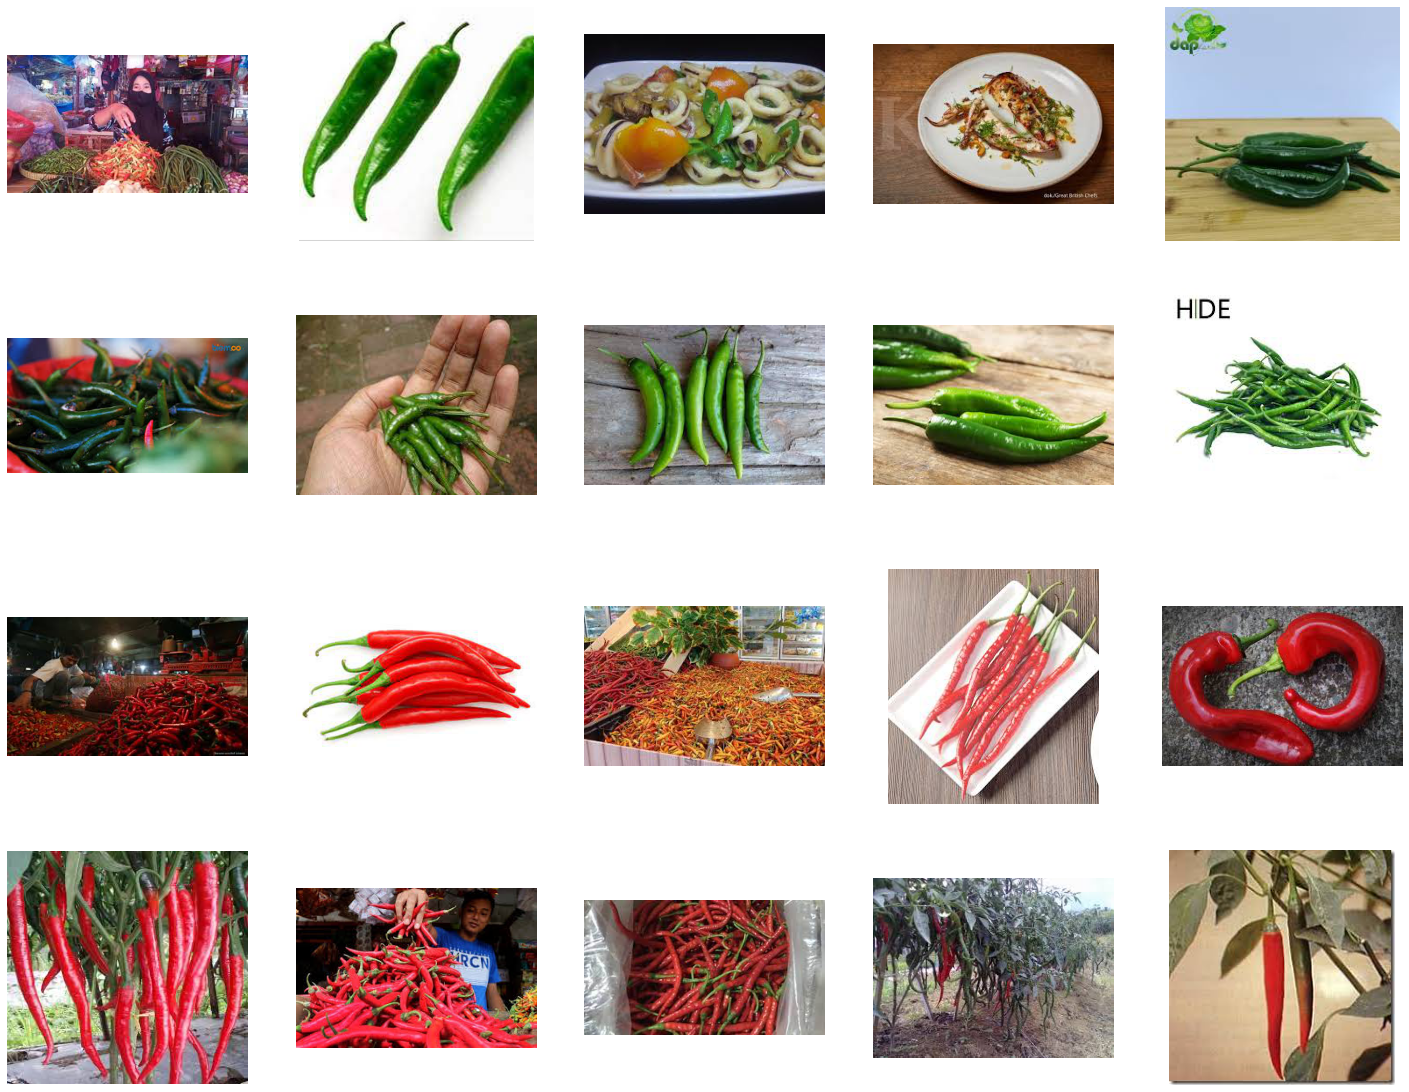

In [73]:
#matplotlib, dan ukurannya agar sesuai dengan foto 5x5
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 10
next_hijau_pic = [os.path.join(cabe_hijau_dir, fname)
              for fname in cabe_hijau_names[pic_index-10:pic_index]]
next_merah_pic = [os.path.join(cabe_merah_dir, fname)
               for fname in cabe_merah_names[pic_index-10:pic_index]]

for i, img_path in enumerate(next_hijau_pic + next_merah_pic):
  #Setup subplot di mualai dari 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') #Ini untuk menampilkan gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Semua gambar di atur ulang skalanya dengan 1/255
cabe_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

#Alur gambar pelatihan dalam batch 100 menggunakan generator cabe_datagen
cabe_generator = cabe_datagen.flow_from_directory(
      '/tmp/cabe/train', #data untuk training
      classes = ['cabe-hijau','cabe-merah'],
      target_size = (200, 200), #semua gambar di ubah ukurannya menjadi 200x200
      batch_size = 100,
      class_mode = 'binary' #Label biner
)
#Alur gambar pelatihan dalam batch 10 menggunakan generator valid_datagen
validation_generator = validation_datagen.flow_from_directory(
      '/tmp/cabe/train',
      classes = ['cabe-hijau', 'cabe-merah'],
      target_size = (200, 200),
      batch_size = 100,
      class_mode = 'binary',
      shuffle = False
)

Found 880 images belonging to 2 classes.
Found 880 images belonging to 2 classes.


In [75]:
#BUAT MODEL NYA FROM SCRATCH
#1. Import Library

import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [77]:
#2. Buat hiden layernya
model = tf.keras.models.Sequential([
                                    #Layer Ke Satu
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Dua
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Tiga
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Empat
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Lima
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Enam
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'), #Ditambahkan sebagai layer ke enam
                                    tf.keras.layers.MaxPooling2D(2,2), #Ditambahkan sebagai layer ke enam
                                    #flaten results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    #512 Neuron
                                    tf.keras.layers.Dense(500, activation='relu'),
                                    #1 output neuoron
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [78]:
#3. Model Sumary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)      

In [79]:
#4. Model Compile
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
#5. Training Model
history = model.fit(cabe_generator,
      steps_per_epoch = 8,  
      epochs = 25,
      verbose = 1,
      validation_data = validation_generator, 
      validation_steps=8)

Epoch 1/25
8/8 [==============================] - 42s 5s/step - loss: 0.5595 - accuracy: 0.6949 - val_loss: 0.2789 - val_accuracy: 0.9413
Epoch 2/25
8/8 [==============================] - 38s 5s/step - loss: 0.2131 - accuracy: 0.9321 - val_loss: 0.1768 - val_accuracy: 0.9475
Epoch 3/25
8/8 [==============================] - 35s 5s/step - loss: 0.1401 - accuracy: 0.9577 - val_loss: 0.1268 - val_accuracy: 0.9550
Epoch 4/25
8/8 [==============================] - 36s 5s/step - loss: 0.1031 - accuracy: 0.9638 - val_loss: 0.1073 - val_accuracy: 0.9588
Epoch 5/25
8/8 [==============================] - 38s 5s/step - loss: 0.1073 - accuracy: 0.9603 - val_loss: 0.0942 - val_accuracy: 0.9588
Epoch 6/25
8/8 [==============================] - 35s 5s/step - loss: 0.0777 - accuracy: 0.9692 - val_loss: 0.0848 - val_accuracy: 0.9712
Epoch 7/25
8/8 [==============================] - 36s 5s/step - loss: 0.0802 - accuracy: 0.9675 - val_loss: 0.0767 - val_accuracy: 0.9725
Epoch 8/25
8/8 [==================

In [82]:
#6. Evaluasi Model
model.evaluate(validation_generator)

9/9 [==============================] - 10s 1s/step - loss: 0.0388 - accuracy: 0.9909


[0.0387575738132, 0.9909090995788574]

In [83]:
#7. Kalkulasi ROC curve dan ploting
STEP_SIZE_TEST = validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

9/9 [==============================] - 10s 1s/step


In [84]:
#Membuat ROC Curve
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [85]:
roc_auc = auc(fpr, tpr)

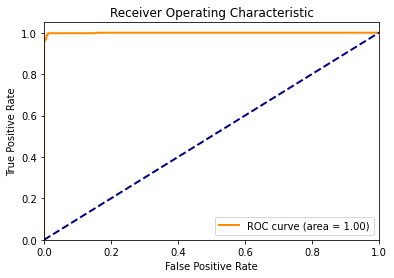

In [86]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [87]:
#Save Model
model.save('model_2.h5')

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

Saving merah.jpg to merah (1).jpg
[1.]
merah.jpg ini adalah cabe merah


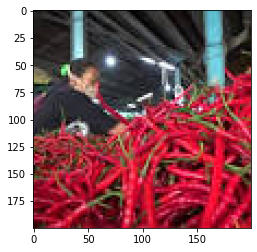

In [96]:
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=25)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " ini adalah cabe hijau")
  else:
    print(fn + " ini adalah cabe merah")

# Support Vektor Machine
Untuk mendeteksi Dieabetes

In [97]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']


In [100]:
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [101]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=None)

In [102]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [103]:
# menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.8031496062992126

# K-NN

In [124]:
#Impor pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [125]:
#Mengambil data dari file csv
datasiswa=pd.read_csv('beasiswa.csv')
X=np.asarray(datasiswa)
x_train=X[:,1:3]
y_train=X[:,3:4]

In [126]:
datasiswa

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak
0,1,0.8,0.8,0.0
1,2,1.2,1.0,0.0
2,3,1.0,1.2,0.0
3,4,2.0,1.5,0.0
4,5,0.7,1.5,0.0
5,6,2.5,3.0,1.0
6,7,3.0,2.5,1.0
7,8,3.0,2.0,1.0
8,9,3.0,3.0,1.0
9,10,3.5,3.9,1.0


In [135]:
#Memanggil KNN
knn=KNeighborsClassifier(n_neighbors=5,
                        weights='uniform',
                        algorithm='auto',
                        metric='euclidean')
#Fit model dengan data latih dan target/label
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [136]:
#Mengambil data dari file csv
datavalidasi=pd.read_csv('validasibeasiswa.csv')
df2=pd.DataFrame(datasiswa,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)','Beasiswa/Tidak'])
X2=np.asarray(datavalidasi)
x_val=X2[:,1:3]
y_val=X2[:,3:4]

In [129]:
datavalidasi

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak *
0,1,0.7,0.7,0
1,2,1.2,1.1,0
2,3,0.6,1.6,0
3,4,2.4,3.1,1
4,5,3.0,2.4,1
5,6,3.4,3.8,1
6,7,2.6,3.4,1


In [130]:
x_val

array([[0.7, 0.7],
       [1.2, 1.1],
       [0.6, 1.6],
       [2.4, 3.1],
       [3. , 2.4],
       [3.4, 3.8],
       [2.6, 3.4]])

In [131]:
#Prediksi
y_pred=knn.predict(x_val)
print((y_val).T)
print(y_pred)
print(classification_report(y_val,y_pred))

[[0. 0. 0. 1. 1. 1. 1.]]
[0. 0. 0. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



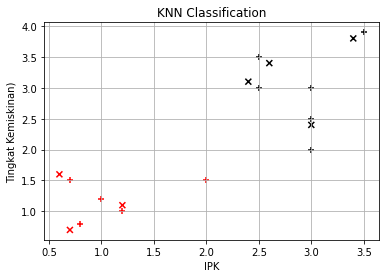

In [132]:
#Visualisasi Data
#plot Data Latih
absis=[x_train[:,0]]
ordinat=[x_train[:,1]]
target=[X[:,3]]
plt.scatter(absis, ordinat, alpha=2, c=target, cmap='flag', marker='+')
#plot Data Uji
absis=[x_val[:,0]]
ordinat=[x_val[:,1]]
target=[X2[:,3]]
plt.scatter(absis, ordinat, alpha=2, c=target, cmap='flag', marker='x')
#Label
plt.xlabel("IPK")
plt.ylabel("Tingkat Kemiskinan)")
plt.title("KNN Classification")
plt.grid()

In [134]:
data=[[2.1,3.5]]
prediksi=knn.predict(data)
print(prediksi)

[1.]
